# Import libraries and dataset
**About Dataset**

**label**

'Spam' indicates that the email is classified as spam.

'Ham' denotes that the email is legitimate (ham).

**text**

This column contains the actual content of the email messages.

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import os
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Load the dataset
df = pd.read_csv('/kaggle/input/emails/email.csv',delimiter=',',encoding='latin-1')
df.head()

/kaggle/input/spam-email-classification/email.csv
/kaggle/input/emails/email.csv


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Transforming categorical labels to numerical ones

In [13]:

# This contains the email text data which will be used as the input feature.
x = df['Message']

# This contains the labels (e.g., 'spam' or 'ham') which will be used as the target.
y = df['Category']
le = LabelEncoder()

y = le.fit_transform(y)


y = y.reshape(-1, 1)


# Splitting the data set

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Data pre processing
**Tokenization**

In [15]:
#  maximum number of words in the vocabulary ,limits the number of unique words 
# that will be considered when tokenizing the text data, setting it to 1000 means only the 1000 most frequent words are considered.
max_words = 1000

# specifies how many words (tokens) each input sequence (text) should have, maximum length of the sequences is set to 150 tokens.
max_len = 150

tok = Tokenizer(num_words=max_words)

tok.fit_on_texts(x_train) #tokenizing training data


sequences = tok.texts_to_sequences(x_train) # Convert the text data  into sequences of integers using the tokenizer

sequences_matrix = pad_sequences(sequences, maxlen=max_len)# Pad the sequences to ensure all sequences have the same length i.e max_len


# Creating the model
**using LSTM,model using functional approach**

In [16]:


def RNN():
    # Input layer (input shape is the padded sequence length)
    ip = Input(shape=[max_len])  # max_len is the sequence length
    
    # Embedding layer (converts tokenized sequences into dense vectors)
    layer = Embedding(input_dim=max_words, output_dim=50, input_length=max_len)(ip)
    
    # LSTM layer
    layer = LSTM(64)(layer)
    
    # Dropout layer for regularization
    layer = Dropout(0.5)(layer)
    
    # fully connected layer for classification
    output = Dense(1, activation='sigmoid')(layer)
    
    # Define the model
    model = Model(inputs=ip, outputs=output)

    model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
    
    return model

model = RNN()

model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 150, 50)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,505 (310.57 KB)

 Trainable params: 79,505 (310.57 KB)

 Non-trainable params: 0 (0.00 B)

# training the model

In [17]:
history=model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
# Extract loss and accuracy values from the history object
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8015 - loss: 0.4691 - val_accuracy: 0.8823 - val_loss: 0.2728
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9232 - loss: 0.2259 - val_accuracy: 0.9316 - val_loss: 0.1964
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9651 - loss: 0.1268 - val_accuracy: 0.9641 - val_loss: 0.1205
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9758 - loss: 0.0865 - val_accuracy: 0.9686 - val_loss: 0.0994
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9838 - loss: 0.0686 - val_accuracy: 0.9709 - val_loss: 0.0952
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9855 - loss: 0.0546 - val_accuracy: 0.9731 - val_loss: 0.0954


# model testing

In [18]:
test_sequences=tok.texts_to_sequences(x_test)
test_sequences_matrix=pad_sequences(test_sequences,maxlen=max_len)

# Test evaluation

In [19]:
accr=model.evaluate(test_sequences_matrix,y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9840 - loss: 0.0603


In [20]:
print('test set\n loss: {:.3f}\n accuracy: {:.3f}\n'.format(accr[0], accr[1]))

test set
 loss: 0.054
 accuracy: 0.984



# Prediction

In [21]:
test_mail=["oh k...i'm watching here:) "]
txt=tok.texts_to_sequences(test_mail)
txt=pad_sequences(txt,maxlen=max_len)

In [22]:
preds=model.predict(txt)
print(preds)
if (preds>0.5):
     print('its not spam')
else:
    print('its a spam')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[[0.00363973]]
its a spam


# Graphs

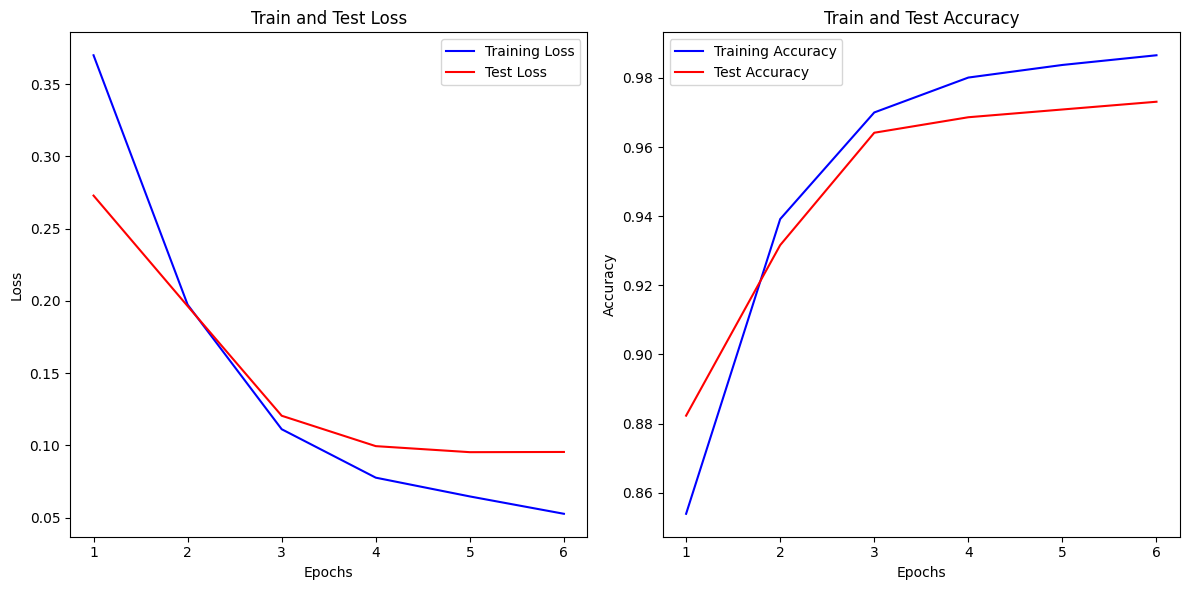

In [23]:
# Plotting the Training and Test Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  #  for the loss graph
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Test Loss', color='red')
plt.title('Train and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)  # for the accuracy graph
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test Accuracy', color='red')
plt.title('Train and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()